# What are models? 

Modelling is a way of representing some phenomenon in a simple, useful way 
It is useful because it makes it easier to understand, define, quantify, visualize, or simulate that phenomenon.
Models can be simple equations that represent the relationship between two variables or complex systems with intricate laws.
And most importantly models  allow us to convert complex datasets to stories. 

## Use models to describe a dataset 

We have already discussed some of the different data models that can be used for describing data properties.
Today we will cover models that try to discover some natural relationships in datasets at lower dimension. 

## What is Dimensionality

Dimensionality is the number of variables, characteristics or features present in the dataset.
This dimensions are represented as columns, and the goal is to reduce the number of them.

Last week we covered the concept of Feature Selection where we select a subset of features of the original dataset.
We also touched briefly on various ways to do that selection. 

## Today we will cover feature extraction

Feature extraction is a process of reducing the dimensionality of a dataset. 
Feature extraction involves combining the existing features into new ones, 
thereby reducing the number of features in the dataset. 
This process reduces the amount of data into manageable sizes for algorithms to process without 
distorting the original relationships or relevant information.

## The advantages of feature extraction

- Reduce computational complexity 
- Reduce noise effects 
- Improve our understanding of the big picture 
- Merge together collinear features

## However before we dive into examples and algorithms lets start by making sure the basics are known

### We covered the mean 

We defined it as the sum of the sample divided by the number of observed elements

$$ \bar{x} = \frac{1}{n} \sum_{i=1}^n x_i $$

With $x_i$	representing the value of one random observation, and $\bar{x}$	as the mean value of all observations
and $n$	is the number of observations. And in our course observation is exactly the same as an event.

## We covered the variance

As the expectation of the squared deviation of a random variable from its mean.
In other words, it measures how far a set of numbers is spread out from their average value.  
$$ \sigma^2 =  \frac{\sum_{i=1}^n(x_i-\bar{x})^2} {n} $$

### We also discussed the normalised version of variance standard deviation

By determining each data point's deviation from the mean, the standard deviation is calculated as the square root of variance.
Within the data set, there will be a higher deviation if the data points are further away from the mean; 
Therefore, the higher the standard deviation, the more spread out the data is.

$$ \sigma =  \frac{\sum_{i=1}^n(x_i-\bar{x})^2} {n} $$

### You should have covered probability in the stats course 

Probability = The expected **relative** frequency of some outcome.  
e.g. for a fair coin $P(heads)=P(tails)=0.5$

### Which leads to the idea of a random variable and conditional probability 
- Variable determined by a random experiemnt or sampling 

For example:

According to a [Nature article](http://www.nature.com/articles/s41598-019-55432-z#data-availability) almost all females have a foot size smaller than 280mm[1].  

In men, the probability of having a foot size larger than 280 is around 0.3, as you can see from this recent study that analysed 1.2 million foot scans.


![](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs41598-019-55432-z/MediaObjects/41598_2019_55432_Fig2_HTML.png?as=webp)

We can confidently state the following from these plots of the probability distribution function (pdf) of different conditional distributions: 

$$ P(FL>fl|M) \neq P(FL>fl|F) $$  

The conditional probability of foot size for males being larger than some limit fl is most of the time different than females

We can be more specific in our comparison and state the directionality of the relationship   

$$ P(FL>fl|M) > P(FL>fl|F) $$  


### The expected value is equal to the sample mean, i.e. the random variable in some experiment 

So $$ E[X] = \bar{x} = \frac{1}{n} \sum_{i=1}^n x_i $$
And the variance would be describing the dispersion or the spread of the sampled observations around the mean  
And Covariance would be the paired variance of two random variables   
$$ Cov[X,Y] = E[[(X-E[X])(Y-E[Y])] $$

### What is an estimator and how do we assess it? 
An "estimator" or "point estimate" is a statistic used to infer the 
value of an unknown parameter in a statistical model.

#### We have some error in every prediction, which is a function of the **accuracy** of your estimator and the **quality** of the observed sample 

$$ \epsilon(x) = \widehat\Theta(x) - \Theta $$


#### We have also the sampling deviation 

The difference is accepting that each sampling has its own error, which is different from the actual error

$$ d(x) = \widehat\Theta(x) - E(\widehat\Theta(X)) $$

#### Which brings us back to Variance 

The variance of $\widehat\Theta$ is simply the expected value of the squared sampling deviations

$$ VAR(\widehat\theta)=E[(\widehat\theta-E[\widehat\theta])^2] $$

#### And Bias

$$ B(\widehat\theta) = E(\widehat\theta)-\theta = E(\widehat\theta-\theta) $$

Which is the expected value of the error, i.e. the mean error of the sample 
Or the difference between the Predicted Value and the Expected Value. 

## But why do we need all of this? 

A possible reason would be to measure the level of association between two or more variables 

### One simple estimator of the association between two variables would be the Covariance

Remember that covariance indicates how closely two random variables change together.  
It's the unscaled measure that indicates the direction of the linear relationship between variables.  
As such it is hard to compare between two variables of different scales 

### The scaled version of the covariance is (you guessed it) correlation

It is a measure used to measure the strenght of assoication between two random variables  
And is just the covariance divided by the product of both variables standard deviation.  
It's values range from -1 to 1 in contrast to the covariance matrix that ranges from $-\infty$ to $\infty$

### Let's make this concrete 

We start by loading the packages 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

%load_ext autoreload
%autoreload 2
plt.style.use('bmh')


In order to demonstrate this point more clearly, I will simulate three variables with known linear dependencies 

In [222]:
M1.shape

(50, 4)

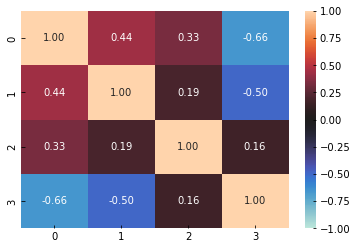

In [224]:
rng = np.random.default_rng(seed=2022)
mean = [0,5,2,1000]
cov = [[1,    0.5,   0.2, -0.7],
       [0.5,  1,   0.1,        -0.6],
       [0.2,  0.1,   1,      0.2],
       [-0.7, -0.6,     0.2,        1]]
M1 = rng.multivariate_normal(mean,cov,size=(50,))
sns.heatmap(np.corrcoef(M1.T),vmin=-1,vmax=1,
            center=0, annot=True, fmt="0.2f")
M1[15,:] = M1[15,:]*[0.5,1,50,0.1]

And plot the different views we discussed 

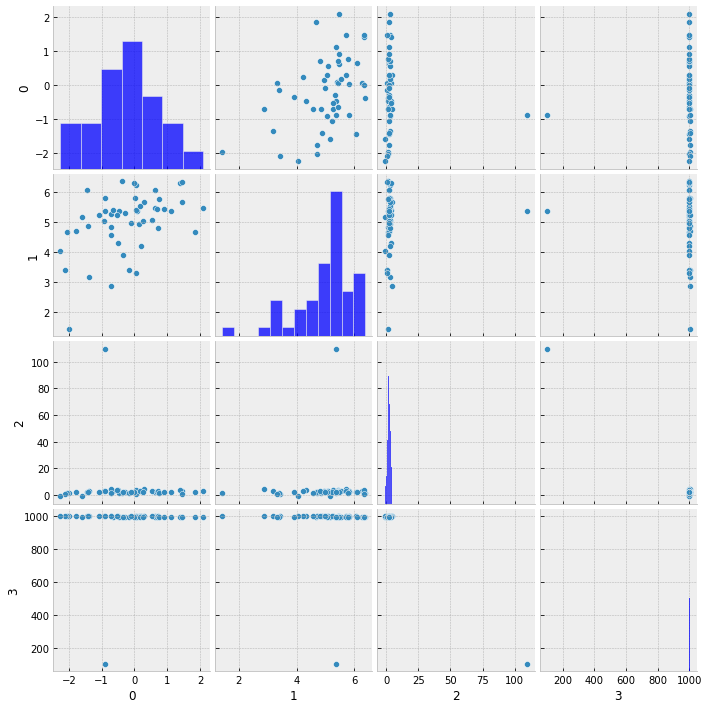

In [226]:
sns.pairplot(pd.DataFrame(M1))

<AxesSubplot:ylabel='Density'>

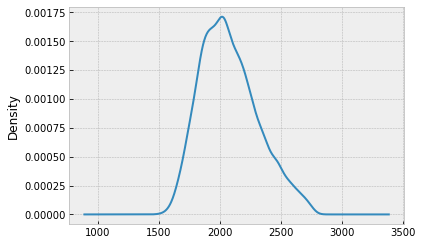

In [255]:
rt[outlier == False].dropna().plot.density()

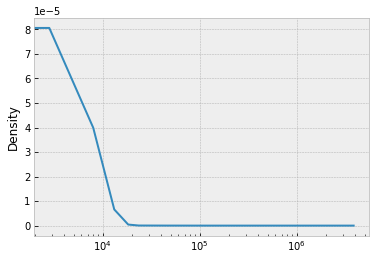

In [334]:
ax = rt.dropna().plot.density()
ax.set_xscale('log')

In [363]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.mixture import BayesianGaussianMixture
def iqr_detection(x):
    q1,q3 = np.nanquantile(x,[0.25,0.75])
    iqr = q3-q1
    return (x < q1-iqr*1.5) | (x > q3+iqr*1.5)
        
def mean_detection(x):
    mu,sd = np.nanmean(x),np.nanstd(x)
    return (x < mu - 3*sd) | (x > mu + 3*sd)

def mad_detection(x):
    q2 = np.nanquantile(x,0.5)
    mad = np.nanmedian(np.abs(x - q2))
    print((mad,q2))
    return (x < q2 - 2.5*mad) | (x > q2 + 2.5*mad)

def mixture_detection(x):
    idx,x_ = x[x.notna()].index, x.dropna().to_frame()
    y_hat = BayesianGaussianMixture(n_components=2, covariance_type="full").fit_predict(x_)
    return x.index.isin(idx[y_hat==1.0])

def local_detection(x):
    idx,x_ = x[x.notna()].index, x.dropna().to_frame()
    y_hat = LocalOutlierFactor().fit_predict(x_)
    return x.index.isin(idx[y_hat==1.0])

<AxesSubplot:>

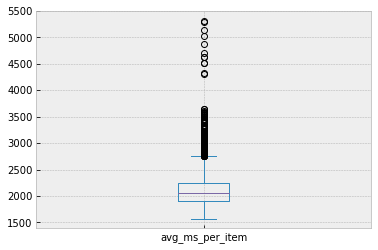

In [364]:
rt[local_detection(rt)].plot.box()

<AxesSubplot:>

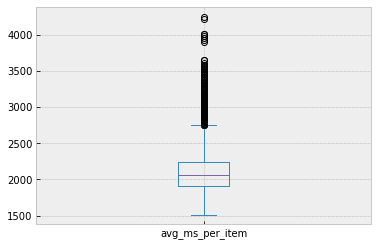

In [351]:
rt[~mixture_detection(rt)].plot.box()

In [345]:
rt.index.isin(idx[y_hat==1.0]).sum()

33

<AxesSubplot:>

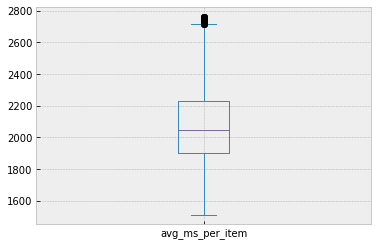

In [321]:
rt[~iqr_detection(rt)].plot.box()

In [330]:
xx[xx.outlier == 0 ]

,avg_ms_per_item,outlier
"(info, user)",,
45312,2052.07381,0.0
45315,1842.607143,0.0
45318,1943.734694,0.0
45319,1900.488095,0.0
45321,2205.033333,0.0
...,...,...
102393,1981.42585,0.0
102902,1932.766667,0.0
102962,2032.444898,0.0


<AxesSubplot:ylabel='Density'>

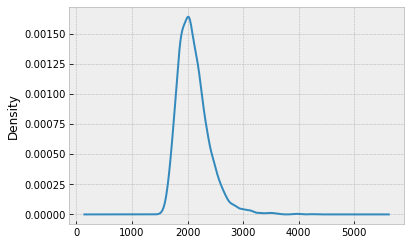

In [332]:
from sklearn.mixture import BayesianGaussianMixture
x = rt.dropna()
mdl = BayesianGaussianMixture(n_components=2, covariance_type="full").fit(x)
y = mdl.predict(rt.dropna().to_frame())
xx = rt.to_frame().assign(outlier = pd.Series(y,index=rt[rt.notna()].index))
xx[xx.outlier == 0 ].avg_ms_per_item.plot.density()


In [327]:
pd.Series(y).value_counts()

0    7716
1      33
dtype: int64

In [322]:
rt[~mixture_detection(rt)].plot.box()

ValueError: Expected 2D array, got 1D array instead:
array=[2052.07380952 1842.60714286 1943.73469388 ... 2047.76156463 1979.925
           nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<AxesSubplot:>

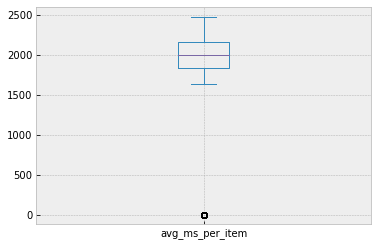

In [281]:
x = rt.to_numpy()
(rt*mad_detection(x)).plot.box()

In [305]:
out = np.array([[-1,0],[0,1]])
out = np.eye(2)*[-1,1]
out[[0,1,1]]

array([[-1.,  0.],
       [-0.,  1.],
       [-0.,  1.]])

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (1).

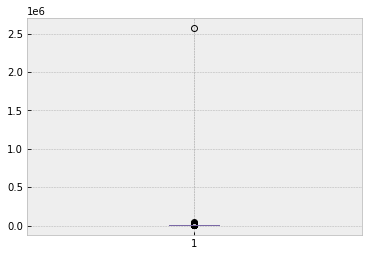

In [251]:
df = pd.read_pickle('12_tasks.pkl')
rt = df.xs('spatial_span',1).avg_ms_per_item

rt.plot.box()
rt[outlier == False].plot.box()
def outlier_removal(x,method='iqr'):    
    if type(x) is pd.Series:
        x = x.to_numpy()
        
    def iqr_detection(x):
        q1,q3 = np.nanquantile(x,[0.25,0.75])
        iqr = q3-q1
        return (x > q1-iqr*1.5) & (x < q3+iqr*1.5)
            
    def mean_detection(x):
        mu,sd = np.nanmean(x),np.nanstd(x)
        return (x > mu - 3*sd) & (x < mu + 3*sd)

    def mad_detection(x):
        q2 = np.nanquantile(x,[0.5])
        mad = np.nanmedian(np.abs(x - q2))
        return (x > q2 - 2.5*mad) & (x < q2 + 2.5*mad)
    
    mask = dict(iqr  = iqr_detection(x),
                mean = mean_detection(x),
                mad  = mad_detection(x))[method]
    
    
    
    

<AxesSubplot:>

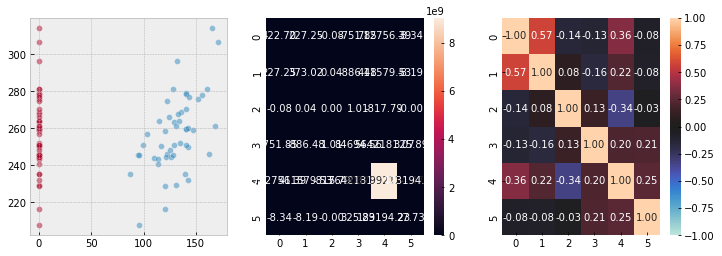

In [77]:
fig,ax = plt.subplots(1,3,figsize=(12,4))
sns.scatterplot(x=X[1,:],y=X[0,:],ax=ax[0],alpha=0.5)
sns.scatterplot(x=X[2,:],y=X[0,:],ax=ax[0],alpha=0.5)
sns.heatmap(np.cov(X),ax=ax[1], annot=True, fmt="0.2f")
sns.heatmap(np.corrcoef(X),ax=ax[2],vmin=-1,vmax=1,
            center=0, annot=True, fmt="0.2f")

Importantly we can also inspect the observations (this can be a simple way to screen for outliers)

<AxesSubplot:>

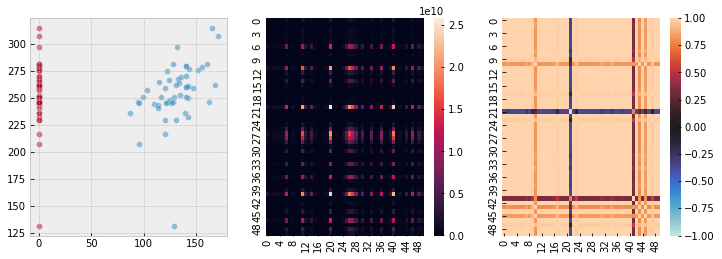

In [73]:
fig,ax = plt.subplots(1,3,figsize=(12,4))
sns.scatterplot(x=X[1,:],y=X[0,:],ax=ax[0],alpha=0.5)
sns.scatterplot(x=X[2,:],y=X[0,:],ax=ax[0],alpha=0.5)
sns.heatmap(np.cov(X.T),ax=ax[1])
sns.heatmap(np.corrcoef(X.T),ax=ax[2],vmin=-1,vmax=1,
            center=0)

## Principal Component Analysis (PCA)

By using PCA, we find directions of maximum variance in high-dimensional data,
and we project these directions into a new subspace with the same or fewer dimensions than the original one.

## Maximal Variance and Information Loss
Data points will be projected in the direction of maximal variance to form a new axis. 
The further the points are to the axis, the biggest the information loss.

<AxesSubplot:>

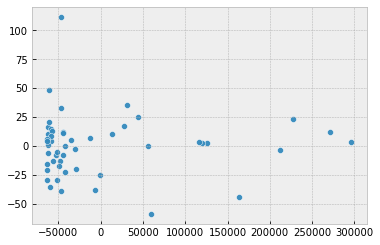

In [65]:
## add outlier extraction example 

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.T)
sns.scatterplot(x=X_reduced[:,0],y=X_reduced[:,1],alpha=0.95)

In [66]:
pca.explained_variance_ratio_

array([9.99999890e-01, 8.09927679e-08])

<AxesSubplot:>

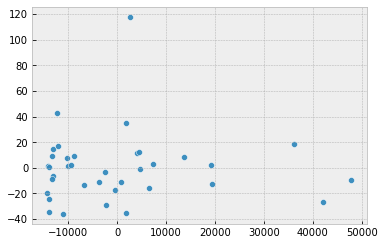

In [67]:
ix = X_reduced[:,0]<100
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X[:,ix].T)
sns.scatterplot(x=X_reduced[:,0],y=X_reduced[:,1],alpha=0.95)

In [68]:
pca.components_

array([[ 4.03822231e-04,  1.34075286e-04, -5.54436856e-08,
         9.99999909e-01],
       [-9.77535226e-01, -2.10759809e-01,  2.23732578e-03,
         4.23008300e-04]])

In [25]:
print(pca.explained_variance_)

[564.97149437 194.85611337]


In [26]:
pca.explained_variance_ratio_

array([0.74355202, 0.25644773])